# Predicting Future Stock Prices via LSTM

### Training data
https://raw.githubusercontent.com/AISCIENCES/Hands-on-Python-for-Data-Science-and-Machine-Learning/master/Datasets/fb_train.csv

###Test data
https://raw.githubusercontent.com/AISCIENCES/Hands-on-Python-for-Data-Science-and-Machine-Learning/master/Datasets/fb_test.csv

#SET Index Information
https://www.wsj.com/market-data/quotes/index/TH/XBKK/SET/historical-prices

In [ ]:
pip install --upgrade tensorflow

     |████████████████████████████████| 462 kB 12.4 MB/s 


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
# importing libraries
import pandas as pd
import numpy as np

#importing dataset
fb_complete_data = pd.read_csv("https://raw.githubusercontent.com/AISCIENCES/Hands-on-Python-for-Data-Science-and-Machine-Learning/master/Datasets/fb_train.csv")

In [ ]:
#printing dataset header
fb_complete_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
3,2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
4,2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000


In [ ]:
#filtering open column
fb_training_processed = fb_complete_data[['Open']].values

In [ ]:
#scaling features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

fb_training_scaled = scaler.fit_transform(fb_training_processed)

In [ ]:
len(fb_training_scaled)

1257

In [ ]:
#training features containd data of last 60 days
#training labels contain data of 61st day

fb_training_features= []
fb_training_labels = []
for i in range(60, len(fb_training_scaled)):
    fb_training_features.append(fb_training_scaled[i-60:i, 0])
    fb_training_labels.append(fb_training_scaled[i, 0])

In [ ]:
#converting training data to numpy arrays
X_train = np.array(fb_training_features)
y_train = np.array(fb_training_labels)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(1197, 60)
(1197,)


In [ ]:
print(X_train[0])

In [ ]:
print(X_train[1])

In [ ]:
#converting data into 3D shape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Activation, Dense, Flatten, Dropout,  Flatten, LSTM
from tensorflow.keras.models import Model

In [ ]:
#defining the LSTM network

input_layer = Input(shape = (X_train.shape[1], 1))
lstm1 = LSTM(100, activation='relu', return_sequences=True)(input_layer)
do1 = Dropout(0.2)(lstm1)
lstm2 = LSTM(100, activation='relu', return_sequences=True)(do1)
do2 = Dropout(0.2)(lstm2)
lstm3 = LSTM(100, activation='relu', return_sequences=True)(do2)
do3 = Dropout(0.2)(lstm3)
lstm4 = LSTM(100, activation='relu')(do3)
do4 = Dropout(0.2)(lstm4)

output_layer = Dense(1)(do4)
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')

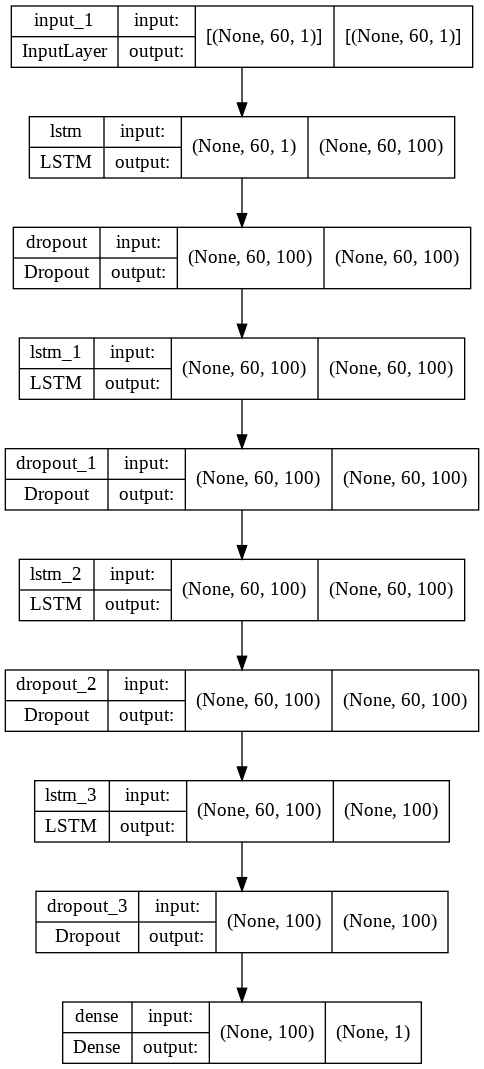

In [ ]:
#plotting model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [ ]:
print(X_train.shape)
print(y_train.shape)
y_train= y_train.reshape(-1,1)
print(y_train.shape)

(1197, 60, 1)
(1197,)
(1197, 1)


In [ ]:
#training the model
model_history = model.fit(X_train, y_train, epochs=10, verbose=1, batch_size = 32)

Epoch 1/10
38/38 [==============================] - 33s 690ms/step - loss: 0.0674
Epoch 2/10
38/38 [==============================] - 27s 720ms/step - loss: 0.0075
Epoch 3/10
38/38 [==============================] - 26s 686ms/step - loss: 0.0066
Epoch 4/10
38/38 [==============================] - 26s 681ms/step - loss: 0.0061
Epoch 5/10
38/38 [==============================] - 27s 714ms/step - loss: 0.0055
Epoch 6/10
38/38 [==============================] - 26s 682ms/step - loss: 0.0058
Epoch 7/10
38/38 [==============================] - 28s 751ms/step - loss: 0.0057
Epoch 8/10
38/38 [==============================] - 26s 678ms/step - loss: 0.0058
Epoch 9/10
38/38 [==============================] - 25s 670ms/step - loss: 0.0048
Epoch 10/10
38/38 [==============================] - 26s 676ms/step - loss: 0.0051


In [ ]:
#creating test set
fb_testing_complete_data = pd.read_csv("https://raw.githubusercontent.com/AISCIENCES/Hands-on-Python-for-Data-Science-and-Machine-Learning/master/Datasets/fb_test.csv")
fb_testing_processed = fb_testing_complete_data[['Open']].values

In [ ]:
fb_all_data = pd.concat((fb_complete_data['Open'], fb_testing_complete_data['Open']), axis=0)

In [ ]:
test_inputs = fb_all_data [len(fb_all_data ) - len(fb_testing_complete_data) - 60:].values
print(test_inputs.shape)

(80,)


In [ ]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
print(test_inputs.shape)

(80, 1)


In [ ]:
fb_test_features = []
for i in range(60, 80):
    fb_test_features.append(test_inputs[i-60:i, 0])

In [ ]:
X_test = np.array(fb_test_features)
print(X_test.shape)

(20, 60)


In [ ]:
#converting test data into 3D shape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(20, 60, 1)


In [ ]:
#making predicitons on test set
y_pred =  model.predict(X_test)
print(y_pred.shape)

(20, 1)


In [ ]:
#converting scaled data back to original data
y_pred = scaler.inverse_transform(y_pred)

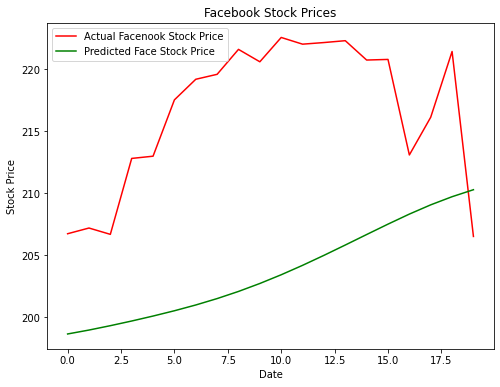

In [ ]:
#plotting original and predicted stock values
plt.figure(figsize=(8,6))
plt.plot(fb_testing_processed, color='red', label='Actual Facenook Stock Price')
plt.plot(y_pred , color='green', label='Predicted Face Stock Price')
plt.title('Facebook Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()